### Only taking path and sentence for filtered_validated.tsv

In [2]:
import pandas as pd

# Load the filtered_validated.tsv file into a pandas dataframe
df = pd.read_csv("./tsv_files/filtered_validated.tsv", sep='\t')

# extract the filename without the .mp3 extension
df['path'] = df['path'].str.replace('.mp3', '')

# Select the desired columns
df = df[["path", "sentence"]]

# Save the new dataframe as a tsv file
df.to_csv("./tsv_files/simple_validated.tsv", sep='\t', index=False)


C:\Users\Simon\AppData\Local\Temp\ipykernel_29928\3325446523.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['path'] = df['path'].str.replace('.mp3', '')


### Test fonction data augmentation 1 file mp3

In [19]:
#Import stuff

import numpy as np
import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

def load_audio_file(file_path):
    # input_length = 16000
    data = librosa.core.load(file_path)[0] #, sr=16000
    # if len(data)>input_length:
    # data = data[:input_length]
    # else:
        # data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()


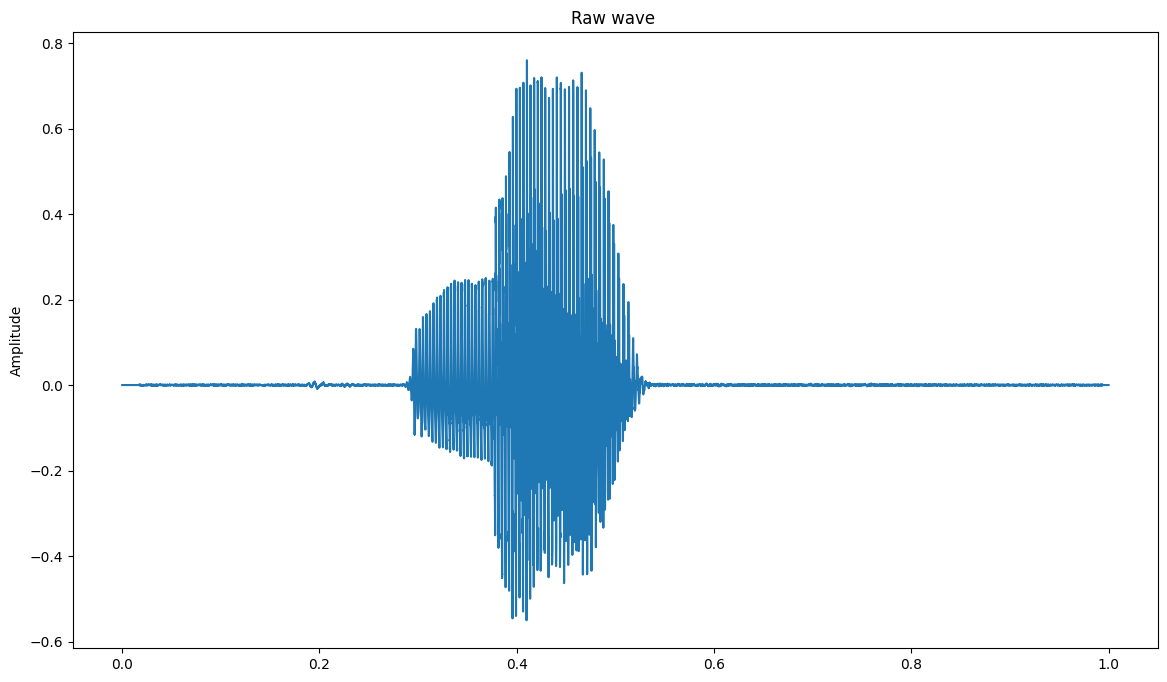

In [33]:
path = "common_voice_en_22015809.wav"

data = load_audio_file(path)
plot_time_series(data)
#Hear it ! 
ipd.Audio(data, rate=16000)

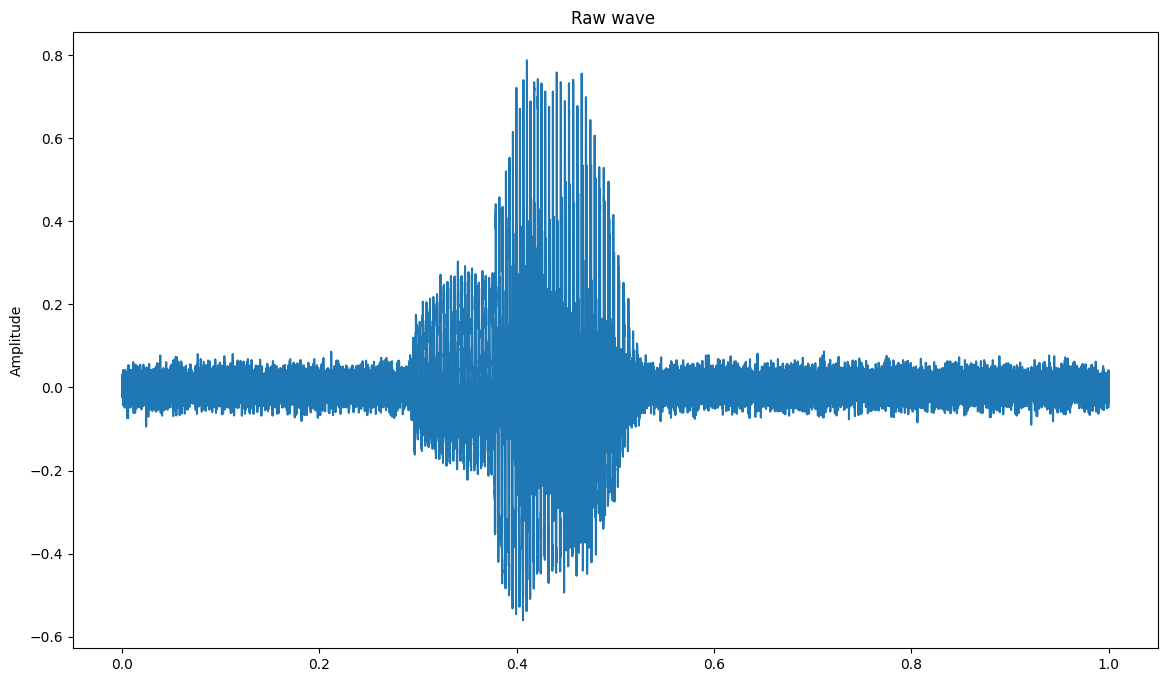

In [34]:
# Adding white noise 
wn = np.random.randn(len(data))
data_wn = data + 0.03*max(data)*wn
plot_time_series(data_wn)
# We limited the amplitude of the noise so we can still hear the word even with the noise, 
#which is the objective
ipd.Audio(data_wn, rate=16000)

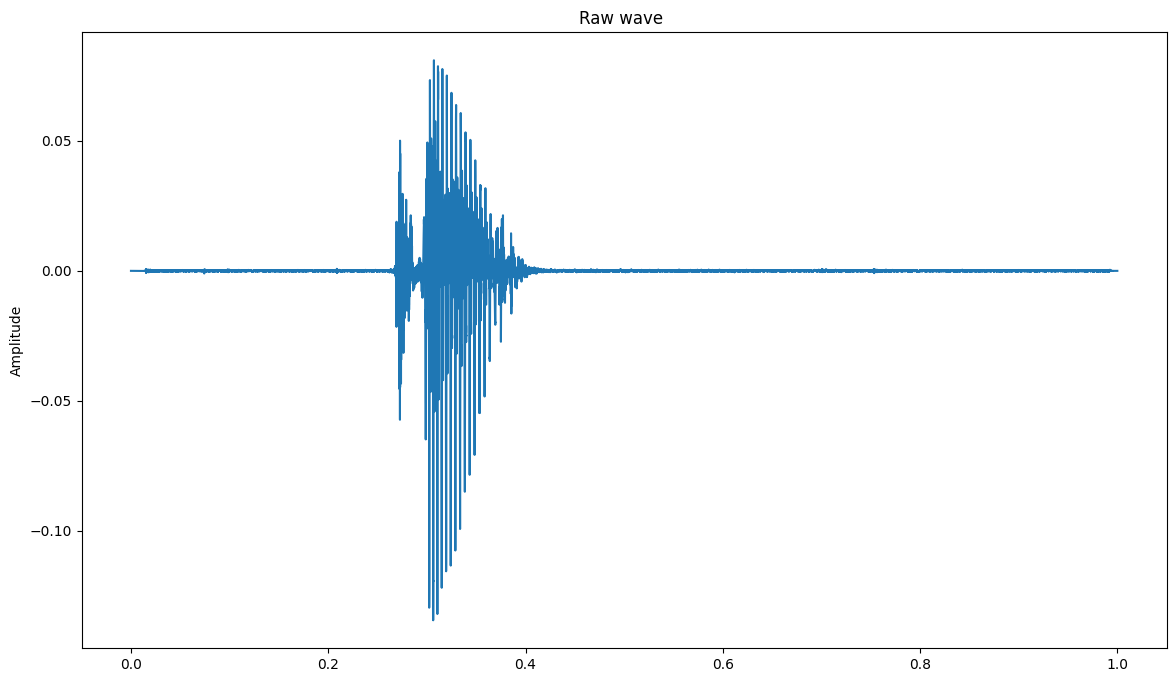

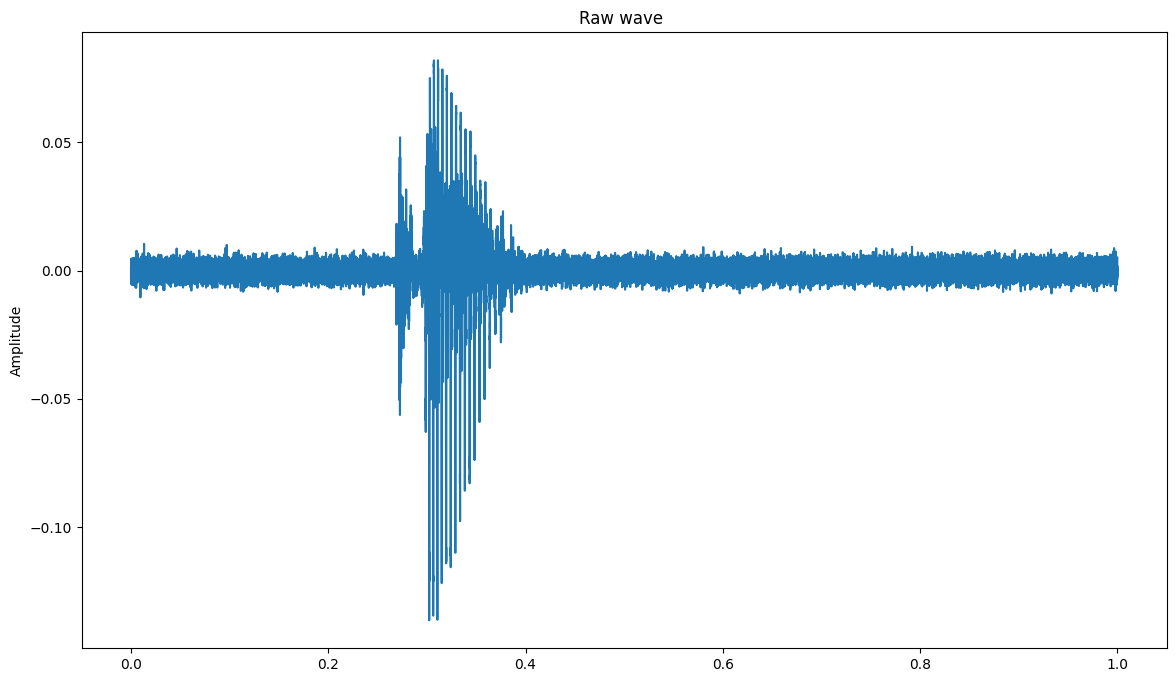

In [35]:
# common_voice_en_21875014.wav

path = "common_voice_en_21875014.wav"

data = load_audio_file(path)
plot_time_series(data)
#Hear it ! 
ipd.Audio(data, rate=16000)


# Adding white noise 
wn = np.random.randn(len(data))
data_wn = data + 0.03*max(data)*wn
plot_time_series(data_wn)
# We limited the amplitude of the noise so we can still hear the word even with the noise, 
#which is the objective
ipd.Audio(data_wn, rate=16000)

### Streching...

In [39]:
# stretching the sound
def stretch(data, rate=1):
    input_length = 16000
    data = librosa.effects.time_stretch(data, rate)
    return data


C:\Users\Simon\AppData\Local\Temp\ipykernel_29928\4159210723.py:4: FutureWarning: Pass rate=1.2 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data = librosa.effects.time_stretch(data, rate)


Higher frequencies  


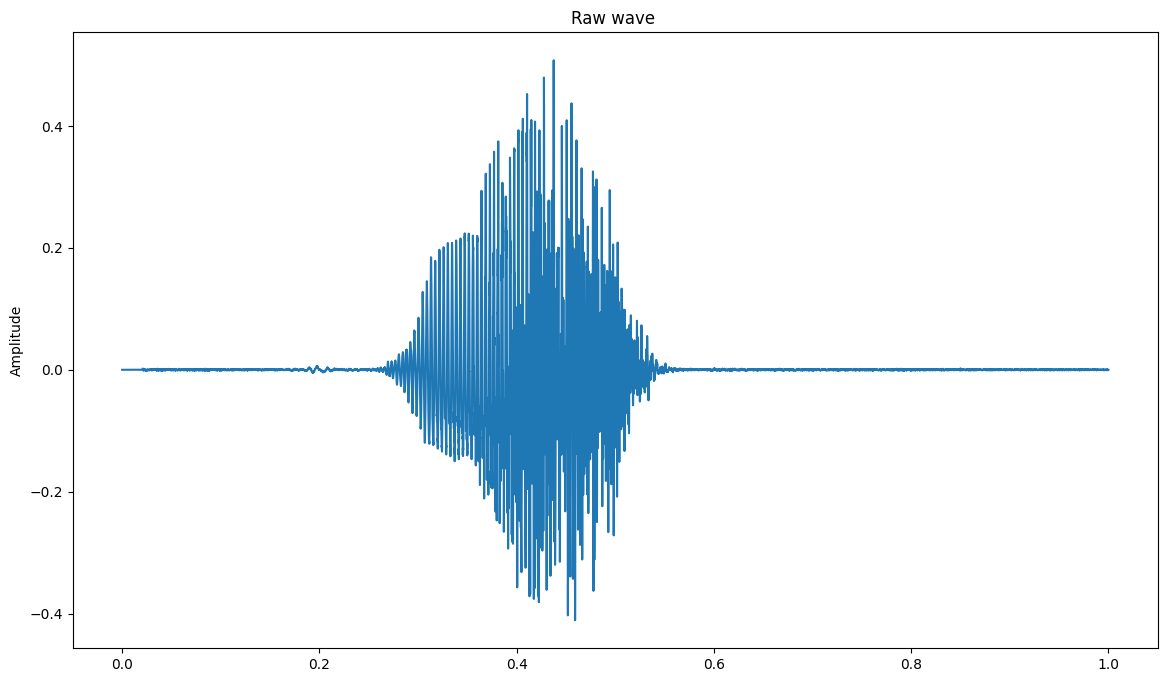

In [45]:
# path = "common_voice_en_21875014.wav"
path = "common_voice_en_22015809.wav"

data = load_audio_file(path)

# data_stretch =stretch(data, 0.8)
# print("This makes the sound deeper but we can still hear 'off' ")
# plot_time_series(data_stretch)
# ipd.Audio(data_stretch, rate=16000)

data_stretch =stretch(data, 1.2)
print("Higher frequencies  ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)

### Storing the audio file with the correct name and extension

In [46]:
import soundfile as sf
import os 

path = "common_voice_en_22015809.wav"
filename, extension = os.path.splitext(path)
filename = filename + "_high_freq" + extension

sf.write(filename, data_stretch, 16000)


In [ ]:
# import os

# # Read the simple_validated.tsv file
# with open('./tsv_files/simple_validated.tsv', 'r') as f:
#     lines = f.readlines()

# # Open the new simple_validated_augmented.tsv file
# with open('./tsv_files/simple_validated_augmented.tsv', 'w') as f:
#     # Write the header line to the new file
#     f.write(lines[0])
#     # Loop through the rest of the lines
#     for line in lines[1:]:
#         # Split the line into columns
#         columns = line.strip().split('\t')
#         # Get the original path
#         path = columns[1]
#         # Extract the file name and add "_high_freq" to it
#         file_name = os.path.splitext(path)[0] + "_high_freq"
#         # Write the new line to the file
#         f.write('\t'.join([columns[0], file_name, columns[2]] + columns[3:]))
#         f.write('\n')


### Functions to add noise, streching and save augmented audio files

In [3]:
import numpy as np

def add_noise_to_audio(data, factor):
    wn = np.random.randn(len(data))
    data_wn = data + factor*max(data)*wn
    return data_wn

def add_stretch_to_audio(data, factor):
    data = librosa.effects.time_stretch(y = data, rate = factor)
    return data

# def (file_modification):


In [10]:
import pandas as pd
import audiofile
import scipy.signal as sps
import os
import librosa

def save_audio_file(data, path, suffix, factor):
    filename, extension = os.path.splitext(path)
    # filename = filename + "_high_freq_" + extension
    filename = filename + suffix + str(factor) + extension
    audiofile.write(filename, data, 16000)

def load_from_wav(filePath,sr):
    sig, fs = audiofile.read(filePath)
    dec_factor = fs//sr
    if dec_factor > 1:
        audio = sps.decimate(sig, dec_factor)
    arr = np.array(audio, dtype=float)
    return arr,sr

def generate_augmented_audio(tsv_filepath,src_audio_path,target_file_path, noise_factor, stretch_factor_low, stretch_factor_high):
    df = pd.read_csv(tsv_filepath, delimiter='\t')
    new_df = pd.DataFrame()
    new_rows = []
    for index, row in df.iterrows():
        y, sr = load_from_wav(src_audio_path+row["path"]+".wav",16000)
        if index%5 == 0:
            # Add noise
            y_noise = add_noise_to_audio(y, noise_factor)
            save_audio_file(y_noise, src_audio_path+row["path"]+".wav", "_noise_", noise_factor)
            new_rows.append([row["path"]+"_noise_"+str(noise_factor), row["sentence"]])
        elif index %10 == 1:
            # Add stretch
            y_stretch = add_stretch_to_audio(y, stretch_factor_low)
            save_audio_file(y_stretch, src_audio_path+row["path"]+".wav", "_pitch_", stretch_factor_low)
            new_rows.append([row["path"]+"_pitch_"+str(stretch_factor_low), row["sentence"]])
        elif index %10 == 2:
            # Add stretch
            y_stretch = add_stretch_to_audio(y, stretch_factor_high)
            save_audio_file(y_stretch, src_audio_path+row["path"]+".wav", "_pitch_", stretch_factor_high)
            new_rows.append([row["path"]+"_pitch_"+str(stretch_factor_high), row["sentence"]])

    new_df = pd.DataFrame(new_rows, columns = ['path', 'sentence'])
    df2 = pd.concat([new_df,df.loc[:]]).reset_index(drop=True)
    df2.to_csv(target_file_path, sep="\t")
    return df2

        


In [11]:

tsv_filepath = "../utils/tsv_files/simple_validated.tsv"
src_audio_path = "../data/common_voice/"
target_file_path = "../utils/tsv_files/simple_validated_augmented.tsv"
noise_factor = 0.03
stretch_factor_low = 0.8
stretch_factor_high = 1.2
df2 = generate_augmented_audio(tsv_filepath,src_audio_path,target_file_path, noise_factor, stretch_factor_low, stretch_factor_high)


OSError: Cannot save file into a non-existent directory: 'tsv_files'

In [14]:
def generate_augmented_audio2(tsv_filepath,src_audio_path,target_file_path, noise_factor, stretch_factor_low, stretch_factor_high):
    df = pd.read_csv(tsv_filepath, delimiter='\t')
    new_df = pd.DataFrame()
    new_rows = []
    for index, row in df.iterrows():
        if index%5 == 0:

            new_rows.append([row["path"]+"_noise_"+str(noise_factor), row["sentence"]])
        elif index %10 == 1:

            new_rows.append([row["path"]+"_pitch_"+str(stretch_factor_low), row["sentence"]])
        elif index %10 == 2:
            new_rows.append([row["path"]+"_pitch_"+str(stretch_factor_high), row["sentence"]])

    new_df = pd.DataFrame(new_rows, columns = ['path', 'sentence'])
    df2 = pd.concat([new_df,df.loc[:]]).reset_index(drop=True)
    df2.to_csv(target_file_path, sep="\t")
    return df2


tsv_filepath = "../utils/tsv_files/simple_validated.tsv"
src_audio_path = "../data/common_voice/"
target_file_path = "../utils/tsv_files/simple_validated_augmented.tsv"
noise_factor = 0.03
stretch_factor_low = 0.8
stretch_factor_high = 1.2
df2 = generate_augmented_audio2(tsv_filepath,src_audio_path,target_file_path, noise_factor, stretch_factor_low, stretch_factor_high)
